# Principal Component Analysis with scikit-learn in Python -- Project Overview

We going to use for this project the famous IRIS data set. The IRIS data have only 4 features and may not be ideal dataset for PCA. However, our goal is just to illustrate the PCA.

##### Let's import the libraries needed and load the dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

##### Let's load the IRIS dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

##### Let's acces iris which is a dictionary-like object by using .keys() method

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

##### Let's create the dataframe and output the head of the data, and let's use features_names as columns

In [5]:
df = pd.DataFrame(
iris['data'],
columns=iris['feature_names'])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### Let's import StandScaler and create its instance 

In [7]:
from sklearn.preprocessing import StandardScaler
# the instance
scaler = StandardScaler()

##### Let's fit the scaler to the features in our data 

In [8]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

##### Let's transform the dataset to the scaled data

In [12]:
df_scaled = scaler.transform(df)

### Principal Component Analysis (PCA)

##### Let's import PCA and create its instance, and let's see what should we do if we are interested in only first 2 components?

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

##### Let's fit the object to scaled data

In [14]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### Let's transform the data to its first 2PCs

In [15]:
pc12 = pca.transform(df_scaled)

##### pc12 is a numpy array, let's create a dataframe

In [16]:
type(pc12)

numpy.ndarray

In [18]:
df_pca = pd.DataFrame(
pc12,
columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [20]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
PC1    150 non-null float64
PC2    150 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB


##### Let's plot PC1 and PC2, we will pass the target values as c to separate two classes of iris.

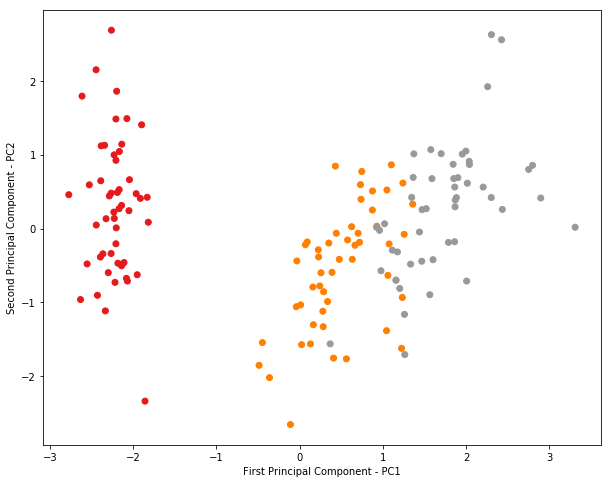

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    c=iris['target'],
    cmap = 'Set1')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')
plt.show()

##### Let's see how to get the components by creating a dataframe and outpout its head.

In [22]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

Each row, in this numpy matrix array, represents a principal component, and each column relates back to the original features.

Let's convert this numpy array into pandas dataframe and visualize this relationship with a heatmap, we will pass the columns from our original dataset.

In [23]:
df_pca_comp = pd.DataFrame(
    pca.components_,
    columns = iris['feature_names'])
df_pca_comp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942


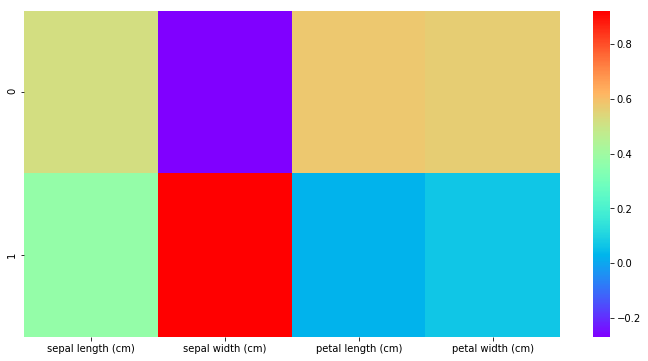

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df_pca_comp,
    cmap = 'rainbow')
plt.show()

## SVM on Principal Components

##### Let's separate features and target classes, and let's do the train test split

In [25]:
#Separating fearures and target values
X = df_pca
y = iris['target']

#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

##### Let's import SVC and create its instance 

In [34]:
from sklearn.svm import SVC
model = SVC(gamma='scale')

##### Let's train our model

In [35]:
model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Let's do predictions

In [37]:
predictions = model.predict(X_test)

##### Let's an evaluation then print the Classification Report and The Confusion Matrix

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

   micro avg       0.93      0.93      0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
